<a href="https://www.kaggle.com/code/mohdmuttalib/national-football-league-nfl-big-data-bowl-2025?scriptVersionId=234196660" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


In [2]:
player_play = pd.read_csv("../input/nfl-big-data-bowl-2025/player_play.csv")
games = pd.read_csv("../input/nfl-big-data-bowl-2025/games.csv")
plays = pd.read_csv("../input/nfl-big-data-bowl-2025/plays.csv")
players = pd.read_csv("../input/nfl-big-data-bowl-2025/players.csv")

In [3]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [4]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

print("Data type of birthDate column before parsing : ", players["birthDate"].dtypes)
players["birthDate"] = pd.to_datetime(players["birthDate"], format='mixed')
print("Data type of birthDate column after parsing : ", players["birthDate"].dtypes)
print(players["birthDate"].head())

Data type of birthDate column before parsing :  object
Data type of birthDate column after parsing :  datetime64[ns]
0   1977-08-03
1   1982-01-22
2   1983-12-02
3   1984-05-19
4   1985-05-17
Name: birthDate, dtype: datetime64[ns]


## Splitting YYYY (Year) from YYYY-MM-DD date format

In [5]:
players['birthYear'] = pd.DatetimeIndex(players['birthDate']).year
print(players["birthYear"])

0       1977.0
1       1982.0
2       1983.0
3       1984.0
4       1985.0
         ...  
1692       NaN
1693       NaN
1694       NaN
1695       NaN
1696       NaN
Name: birthYear, Length: 1697, dtype: float64


## Unique values of birthYear column

In [6]:
print("Unique birth year values and their counts :")
print(players["birthYear"].value_counts())

Unique birth year values and their counts :
birthYear
1996.0    201
1995.0    197
1997.0    182
1994.0    133
1993.0    121
1998.0     97
1992.0     87
1991.0     57
1990.0     41
1999.0     30
1989.0     28
1988.0     15
1987.0      7
1985.0      7
1986.0      3
1982.0      1
1984.0      1
1983.0      1
1977.0      1
Name: count, dtype: int64


## Youngest and Oldest Player birth year

In [7]:
#Sanjay V https://www.kaggle.com/code/sanjayv007/nfl-big-data-bowl-beginner-s-complete-eda

# Newest and oldest player
print("Youngest player birth year : ",max(players["birthYear"]))
print("Oldest player birth year : ",min(players["birthYear"]))

Youngest player birth year :  1999.0
Oldest player birth year :  1977.0


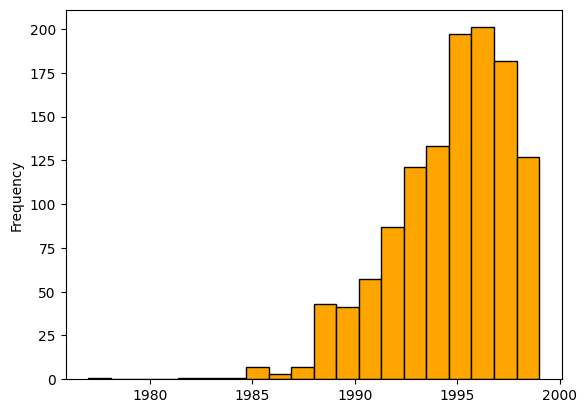

In [8]:
hist = players["birthYear"].plot.hist(bins=20, color="orange", edgecolor="black")

### Unique values of collegeName column

In [9]:
print("Unique college names and their counts : ")
college_names = players.pivot_table(index = ['collegeName'], aggfunc = 'size') 
college_names = college_names.reset_index()
college_names.columns= ["College Names", "Counts"]
college_names = college_names.sort_values("Counts", ascending = False)
print(college_names)

Unique college names and their counts : 
          College Names  Counts
0               Alabama      59
94      Louisiana State      49
137          Ohio State      49
64              Georgia      41
107            Michigan      35
..                  ...     ...
89    Kentucky Wesleyan       1
90             Kutztown       1
166   Southern Arkansas       1
165  Southeast Missouri       1
224    Youngstown State       1

[225 rows x 2 columns]


In [10]:
top_colleges = college_names[0:10]
print(top_colleges)

       College Names  Counts
0            Alabama      59
94   Louisiana State      49
137       Ohio State      49
64           Georgia      41
107         Michigan      35
135       Notre Dame      35
82              Iowa      32
143       Penn State      31
55           Florida      31
138         Oklahoma      29


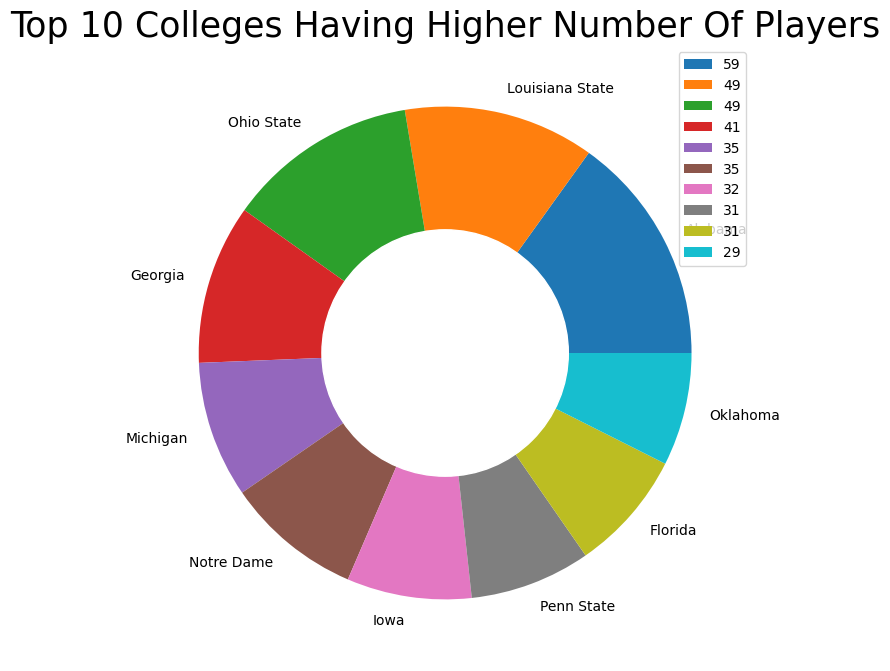

In [11]:
# Creating Donut Plot
fig = plt.figure(figsize = (8, 8)) 
circle = plt.Circle( (0,0), 0.5, color = 'white')
plt.pie(top_colleges["Counts"], labels = top_colleges["College Names"])
p = plt.gcf()
p.gca().add_artist(circle)
#plt.legend(loc=(1.04, 1))
plt.legend(top_colleges["Counts"])
plt.title("Top 10 Colleges Having Higher Number Of Players", fontsize=25)

# Displaying Donut Plot
plt.show() 

### Unique values of Position column

In [12]:
print("Unique position values and their counts :")
pos_val = players.pivot_table(index = ['position'], aggfunc = 'size') 
pos_val = pos_val.reset_index()
pos_val.columns= ["Positions", "Counts"]
pos_val = pos_val.sort_values("Counts", ascending = False)
print(pos_val)

Unique position values and their counts :
   Positions  Counts
18        WR     224
1         CB     189
12       OLB     135
3         DE     131
14        RB     126
17        TE     123
4         DT     121
16         T     117
7          G     107
8        ILB      93
6         FS      79
15        SS      65
13        QB      62
0          C      61
11        NT      32
10       MLB      16
5         FB      14
2         DB       1
9         LB       1


### Players: highest height in feet

In [13]:
height = players[players['height'] == max(players["height"])]
height

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
560,45721,6-9,325,1994-09-20,Arkansas,T,Dan Skipper,1994.0
1313,53522,6-9,321,NaT,Northern Iowa,T,Spencer Brown,NaN
1426,53727,6-9,310,NaT,Duke,T,Devery Hamilton,NaN
1553,54575,6-9,380,NaT,Minnesota,T,Daniel Faalele,NaN


### Players: lowest height in feet

In [14]:
low_height = players[players['height'] == min(players["height"])]
low_height

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,1986.0
18,35459,5-10,185,1988-04-10,Alabama,SS,Kareem Jackson,1988.0
19,35466,5-10,195,1987-08-13,Rutgers,FS,Devin McCourty,1987.0
38,37139,5-10,192,1990-08-22,Kentucky,WR,Randall Cobb,1990.0
44,37724,5-10,199,1989-06-18,Kansas,CB,Chris Harris,1989.0
...,...,...,...,...,...,...,...,...
1617,54668,5-10,205,NaT,Baylor,RB,Trestan Ebner,NaN
1637,54718,5-10,195,NaT,Kansas State,SS,Russ Yeast,NaN
1653,54850,5-10,200,NaT,Georgia Tech,WR,Kyric McGowan,NaN
1673,55071,5-10,180,NaT,Texas Tech,WR,Kaylon Geiger,NaN


### Oldest and youngest players

In [15]:
oldest = players[players['birthYear'] == min(players["birthYear"])]
oldest

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,1977.0


In [16]:
youngest = players[players['birthYear'] == max(players["birthYear"])]
youngest

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
999,52411,6-1,200,1999-02-02,Ohio State,CB,Jeff Okudah,1999.0
1000,52412,6-5,326,1999-01-22,Georgia,T,Andrew Thomas,1999.0
1006,52418,6-5,320,1999-05-17,Alabama,T,Jedrick Wills,1999.0
1007,52421,6-5,322,1999-01-24,Iowa,T,Tristan Wirfs,1999.0
1009,52423,6-1,192,1999-04-24,Alabama,WR,Jerry Jeudy,1999.0
1011,52425,6-2,189,1999-04-08,Oklahoma,WR,CeeDee Lamb,1999.0
1012,52426,6-6,310,1999-08-11,Southern California,T,Austin Jackson,1999.0
1013,52428,6-4,250,1999-07-25,Louisiana State,OLB,K'Lavon Chaisson,1999.0
1014,52429,5-11,195,1999-01-02,Texas Christian,WR,Jalen Reagor,1999.0
1017,52432,6-3,319,1999-06-14,Michigan,G,Cesar Ruiz,1999.0


In [17]:
mean=np.ceil(players['weight'].mean())
median=np.ceil(players['weight'].median())

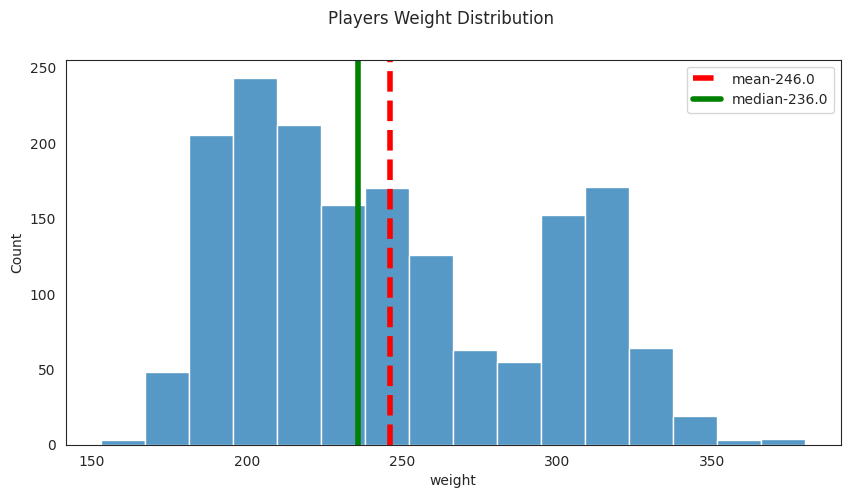

In [18]:
 
plt.figure(figsize=(10, 5))
sns.set_style('white')
hist_plot = sns.histplot(players['weight'], )
hist_plot.axvline(mean, color='r', linestyle='--', linewidth = 4, label = f'mean-{mean}')
hist_plot.axvline(median, color='g', linestyle='-', linewidth = 4, label = f'median-{median}')
plt.suptitle("Players Weight Distribution")
plt.legend();

In [19]:
games.tail()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
131,2022110607,2022,9,11/6/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/6/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/6/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/6/2022,20:20:00,KC,TEN,20,17
135,2022110700,2022,9,11/7/2022,20:15:00,NO,BAL,13,27


### Unique values of season column

In [20]:
 
print("Unique NFL seasons and their counts :")
g_season = games.pivot_table(index = ['season'], aggfunc = 'size') 
g_season = g_season.reset_index()
g_season.columns= ["Seasons", "Counts"]
g_season = g_season.sort_values("Counts", ascending = False)
print(g_season)

Unique NFL seasons and their counts :
   Seasons  Counts
0     2022     136


In [21]:
 
print("Unique NFL weeks and their counts :")
g_week = games.pivot_table(index = ['week'], aggfunc = 'size') 
g_week = g_week.reset_index()
g_week.columns= ["Weeks", "Counts"]
g_week = g_week.sort_values("Counts", ascending = False)
print(g_week)

Unique NFL weeks and their counts :
   Weeks  Counts
0      1      16
1      2      16
2      3      16
3      4      16
4      5      16
7      8      15
5      6      14
6      7      14
8      9      13


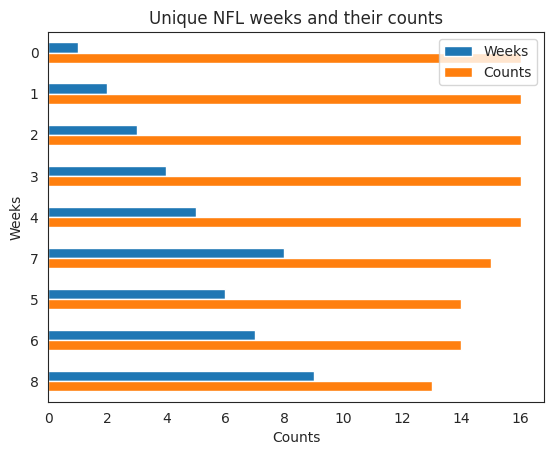

In [22]:
# Add titles, labels, invert y-axis

bar_plot = g_week.plot.barh()
bar_plot.set_title("Unique NFL weeks and their counts")
bar_plot.set_xlabel("Counts")
bar_plot.set_ylabel("Weeks")
bar_plot.invert_yaxis()
plt.show(bar_plot)

## Unique values of gameDate column

In [23]:
 
print("Unique NFL dates and their counts :")
g_date = games.pivot_table(index = ['gameDate'], aggfunc = 'size') 
g_date = g_date.reset_index()
g_date.columns= ["Date", "Counts"]
g_date = g_date.sort_values("Counts", ascending = False)
print(g_date)

Unique NFL dates and their counts :
          Date  Counts
13   10/9/2022      14
4    10/2/2022      14
23   9/25/2022      14
17   9/11/2022      14
10  10/30/2022      13
20   9/18/2022      13
2   10/16/2022      12
6   10/23/2022      12
15   11/6/2022      11
21   9/19/2022       2
16   11/7/2022       1
25   9/29/2022       1
24   9/26/2022       1
22   9/22/2022       1
19   9/15/2022       1
18   9/12/2022       1
0   10/10/2022       1
14   11/3/2022       1
1   10/13/2022       1
12   10/6/2022       1
11  10/31/2022       1
9    10/3/2022       1
8   10/27/2022       1
7   10/24/2022       1
5   10/20/2022       1
3   10/17/2022       1
26    9/8/2022       1


### NFL Dates

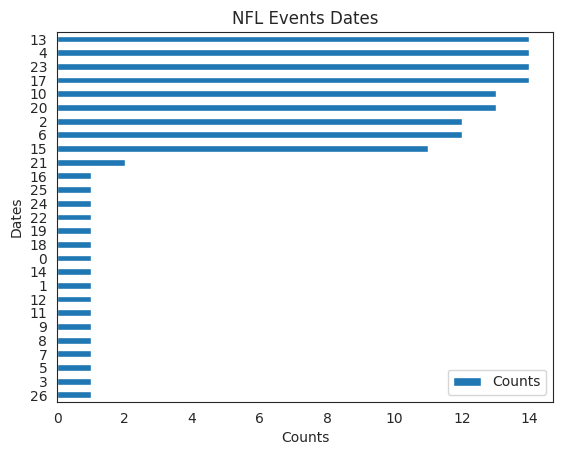

In [24]:
# Add titles, labels, invert y-axis

bar_plot = g_date.plot.barh()
bar_plot.set_title("NFL Events Dates")
bar_plot.set_xlabel("Counts")
bar_plot.set_ylabel("Dates")
bar_plot.invert_yaxis()
plt.show(bar_plot)

### Splitting DD (Date) from MM/DD/YYYY date format

In [25]:
games['gameDay'] = pd.DatetimeIndex(games['gameDate']).day
print(games["gameDay"])

0       8
1      11
2      11
3      11
4      11
       ..
131     6
132     6
133     6
134     6
135     7
Name: gameDay, Length: 136, dtype: int32


### Unique values from gameDay column

In [26]:
 
print("Unique NFL days and their counts :")
g_days = games.pivot_table(index = ['gameDay'], aggfunc = 'size') 
g_days = g_days.reset_index()
g_days.columns= ["Day", "Counts"]
g_days = g_days.sort_values("Counts", ascending = False)
print(g_days)

Unique NFL days and their counts :
    Day  Counts
0     2      14
5     9      14
7    11      14
19   25      14
23   30      13
13   18      13
2     6      12
11   16      12
17   23      12
1     3       2
14   19       2
16   22       1
22   29       1
21   27       1
20   26       1
18   24       1
12   17       1
15   20       1
10   15       1
9    13       1
8    12       1
6    10       1
4     8       1
3     7       1
24   31       1


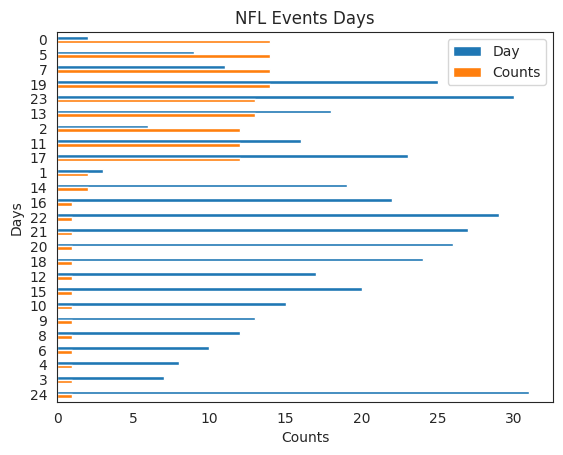

In [27]:
# Add titles, labels, invert y-axis

bar_plot = g_days.plot.barh()
bar_plot.set_title("NFL Events Days")
bar_plot.set_xlabel("Counts")
bar_plot.set_ylabel("Days")
bar_plot.invert_yaxis()
plt.show(bar_plot)

Unique values from gameTimeEastern column

In [28]:
 
print("Unique NFL timings and their counts :")
g_time = games.pivot_table(index = ['gameTimeEastern'], aggfunc = 'size') 
g_time = g_time.reset_index()
g_time.columns= ["Time", "Counts"]
g_time = g_time.sort_values("Counts", ascending = False)
print(g_time)

Unique NFL timings and their counts :
       Time  Counts
0  13:00:00      73
2  16:25:00      21
4  20:15:00      16
1  16:05:00      11
5  20:20:00      10
7   9:30:00       3
3  19:15:00       1
6  20:30:00       1


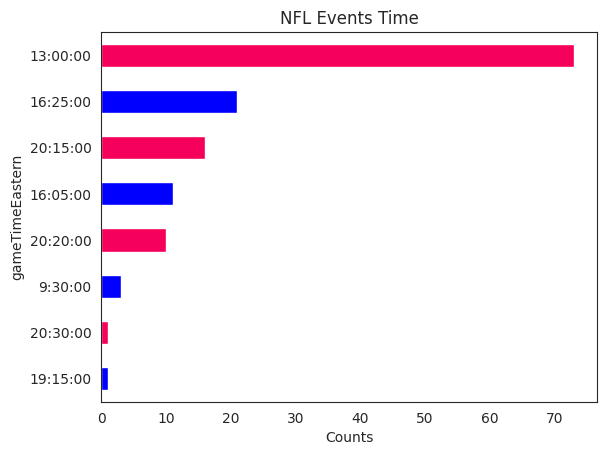

In [29]:
#sort_values so the values in our bar chart will be in increasing order

games["gameTimeEastern"].value_counts().sort_values().plot.barh(color=['blue', '#f5005a'], title='NFL Events Time')
plt.xlabel('Counts');

### Unique values from homeTeamAbbr column

In [30]:
 
print("Unique NFL home teams and their counts :")
g_home = games.pivot_table(index = ['homeTeamAbbr'], aggfunc = 'size') 
g_home = g_home.reset_index()
g_home.columns= ["Home Team", "Counts"]
g_home = g_home.sort_values("Counts", ascending = False)
print(g_home)

Unique NFL home teams and their counts :
   Home Team  Counts
22        NO       6
0        ARI       5
8        DAL       5
29        TB       5
24       NYJ       5
1        ATL       5
14       JAX       5
10       DET       5
16        LA       5
31       WAS       5
4        CAR       5
7        CLE       5
19       MIA       4
2        BAL       4
27       SEA       4
25       PHI       4
23       NYG       4
21        NE       4
9        DEN       4
17       LAC       4
5        CHI       4
15        KC       4
6        CIN       4
13       IND       4
12       HOU       4
11        GB       4
20       MIN       4
18        LV       3
3        BUF       3
26       PIT       3
28        SF       3
30       TEN       3


#### We've 30 teams

Since we have for the 30 teams almost the same number of entries, any chart won't bring information, except the name of the teams by itself.

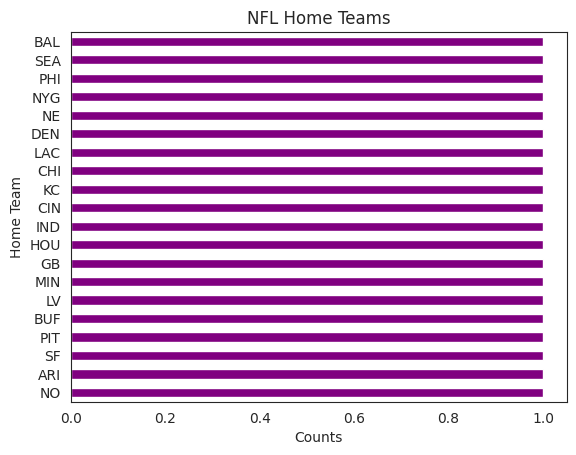

In [31]:
g_home["Home Team"].value_counts().head(20).plot.barh(color='purple', title='NFL Home Teams')
plt.xlabel('Counts');

### Unique values from yardsToGo column

In [32]:
 
print("Unique NFL yards to go and their counts :")
g_yards = plays.pivot_table(index = ['yardsToGo'], aggfunc = 'size') 
g_yards = g_yards.reset_index()
g_yards.columns= ["Yards To Go", "Counts"]
g_yards = g_yards.sort_values("Counts", ascending = False)
print(g_yards)

Unique NFL yards to go and their counts :
    Yards To Go  Counts
9            10    7829
0             1     905
4             5     876
6             7     768
7             8     727
5             6     726
3             4     681
1             2     661
8             9     636
2             3     623
10           11     308
14           15     300
11           12     222
19           20     158
13           14     144
12           13     141
15           16      92
17           18      73
16           17      64
18           19      61
20           21      28
21           22      28
24           25      23
22           23      15
25           26       9
23           24       8
26           27       7
27           28       4
29           30       4
28           29       1
30           36       1
31           38       1


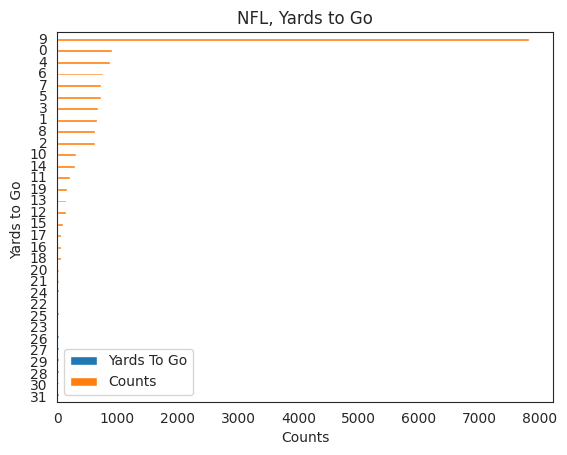

In [33]:
# Add titles, labels, invert y-axis

bar_plot = g_yards.plot.barh()
bar_plot.set_title("NFL, Yards to Go")
bar_plot.set_xlabel("Counts")
bar_plot.set_ylabel("Yards to Go ")
bar_plot.invert_yaxis() #order increasing
plt.show(bar_plot)

### Unique values from OffenseFormation column

In [34]:
 
print("Unique NFL Offense Formation and their counts :")
gp_type = plays.pivot_table(index = ['offenseFormation'], aggfunc = 'size') 
gp_type = gp_type.reset_index()
gp_type.columns= ["Offense Formation", "Counts"]
gp_type = gp_type.sort_values("Counts", ascending = False)
print(gp_type)

Unique NFL Offense Formation and their counts :
  Offense Formation  Counts
4           SHOTGUN    8791
5        SINGLEBACK    3915
0             EMPTY    1342
1            I_FORM    1035
3            PISTOL     641
2             JUMBO     125
6           WILDCAT      87


## NFL Offense Formation

EMPTY backfield

"Also known simply as "Five-wide", a reference to the five wide receivers. In the empty backfield formation, all of the backs play near the line of scrimmage to act as extra wide receivers or tight ends, with the quarterback lining up either under center or, most commonly, in the shotgun. This is almost exclusively a passing formation used to spread the field, often to open up short inside routes or screen routes. The most common running play from this formation is a quarterback draw play up the middle since defensive players are spread out from sideline to sideline."

PISTOL

"It is essentially a shotgun variation, with the quarterback lined up closer than in standard shotgun (normally 3 to 4 yards behind center), and a running back lined up behind, rather than next to, the QB (normally at 3 to 4 yards behind quarterback). The pistol formation adds the dimension of a running game with the halfback being in a singleback position. This has disrupted the timing of some defenses with the way the quarterback hands the ball off to the halfback. This also allows the smaller halfbacks to hide behind the offensive line, causing opposing linebackers and pass-rushing defensive linemen to play more conservatively."

JUMBO

"Goal line formation. Also called "jumbo", "heavy", "full house" and other similar names, this formation is used exclusively in short-yardage situations, and especially near the goal line. This formation typically has no wide receivers, and often employs 3 tight ends and 2 running backs, or alternately 2 tight ends and 3 running backs. Often, a tight end or full back position is occupied by a player who normally plays offensive line or defensive line positions to act as an extra blocker."

WILDCAT

"The wildcat is primarily a running formation in which an athletic player (usually a running back or a receiver who runs well) takes the place of the team's usual quarterback in a shotgun formation while the quarterback lines up wide as a flanker or is replaced by another player. The ball is snapped to the runner, who usually has the option of either running the ball himself or handing it to another running back lined up in the backfield. The wildcat gives the runner a good look at the defense before the snap, allowing him to choose the best running lane. It also allows for ten offensive players to block, unlike in a conventional running play, in which the quarterback is usually not involved after delivering the ball to a running back."

https://en.wikipedia.org/wiki/List_of_formations_in_American_football

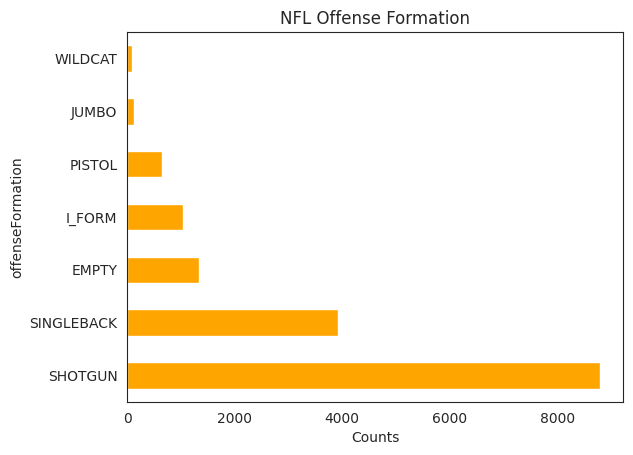

In [35]:
plays["offenseFormation"].value_counts().plot.barh(color='orange', title='NFL Offense Formation')
plt.xlabel('Counts');

### Unique values from pre-snap homeTeam Win Probability column

In [36]:
 
print("Unique NFL Pre-snap Home Team Win Probability and their counts :")
g_home = plays.pivot_table(index = ['preSnapHomeTeamWinProbability'], aggfunc = 'size') 
g_home = g_home.reset_index()
g_home.columns= ["Pre-Snap HomeTeam Win Probability", "Counts"]
g_home = g_home.sort_values("Counts", ascending = False)
print(g_home)

Unique NFL Pre-snap Home Team Win Probability and their counts :
       Pre-Snap HomeTeam Win Probability  Counts
11797                           0.777446       5
7830                            0.568721       4
5535                            0.422091       4
8003                            0.577909       3
8921                            0.625304       3
...                                  ...     ...
5357                            0.412034       1
5358                            0.412041       1
5359                            0.412093       1
5360                            0.412101       1
16039                           0.999197       1

[16040 rows x 2 columns]


### NFL Pre-Snap HomeTeam Win Probability Distribution (Histogram)

It's normal, unimodal, symetric distribution. 

I'm still trying to undertand what's a "**NFL Pre-Snap HomeTeam Win Probability normal, unimodal, symetric distribution**"

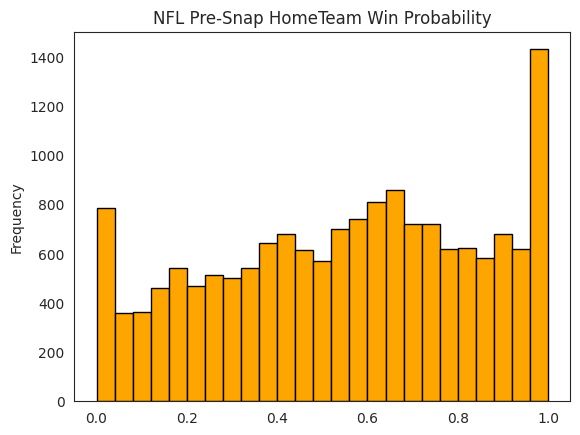

In [37]:

hist = plays["preSnapHomeTeamWinProbability"].plot.hist(bins=25, color="orange", edgecolor="black")
plt.title('NFL Pre-Snap HomeTeam Win Probability');

### Unique values of pass result column

In [38]:
 
print("Unique NFL pass results and their counts :")
g_res = plays.pivot_table(index = ['passResult'], aggfunc = 'size') 
g_res = g_res.reset_index()
g_res.columns= ["Pass Results", "Counts"]
g_res = g_res.sort_values("Counts", ascending = False)
print(g_res)

Unique NFL pass results and their counts :
  Pass Results  Counts
0            C    5624
1            I    2911
4            S     608
3            R     400
2           IN     193


### Pass Result: C, I, S, R, IN

Dropback outcome of the play (C: **Complete pass**, I: **Incomplete** pass, S: **Quarterback sack**, IN: **Intercepted** pass, R: **Scramble**, text)

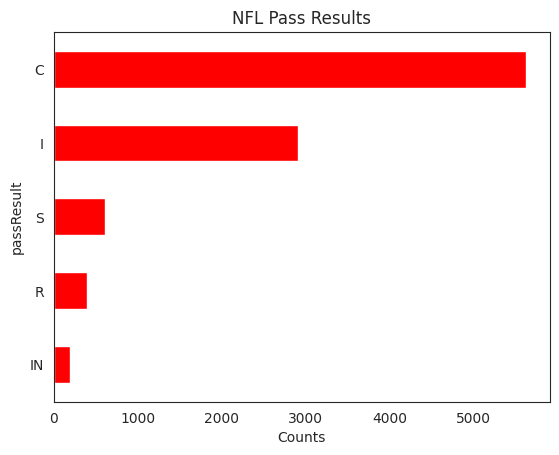

In [39]:
#sort_values() to rank increasing values

plays["passResult"].value_counts().sort_values().plot.barh(color='red', title='NFL Pass Results')
plt.xlabel('Counts');

### Unique values from absolute yardline number column

In [40]:
 
print("Unique NFL absolute yardline numbers and their counts :")
g_abyl = plays.pivot_table(index = ['absoluteYardlineNumber'], aggfunc = 'size') 
g_abyl = g_abyl.reset_index()
g_abyl.columns= ["Absolute YardLine Number", "Counts"]
g_abyl = g_abyl.sort_values("Counts", ascending = False)
print(g_abyl)

Unique NFL absolute yardline numbers and their counts :
    Absolute YardLine Number  Counts
74                        85     656
24                        35     578
29                        40     232
63                        74     228
65                        76     227
..                       ...     ...
93                       104      69
2                         13      66
1                         12      63
5                         16      58
3                         14      50

[99 rows x 2 columns]


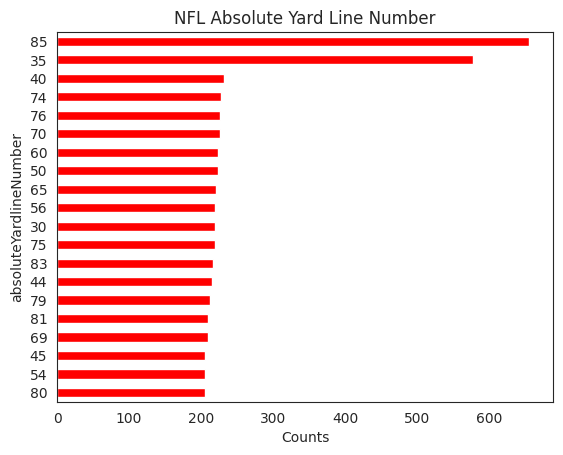

In [41]:
#sort_values() to rank increasing values

plays["absoluteYardlineNumber"].value_counts().head(20).sort_values().plot.barh(color='red', title='NFL Absolute Yard Line Number')
plt.xlabel('Counts');

In [42]:
tracking1 = pd.read_csv("../input/nfl-big-data-bowl-2025/tracking_week_1.csv")
tracking1.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


#Splitting date from datetime

In [43]:
tracking1['date'] = pd.DatetimeIndex(tracking1['time']).date
print(tracking1["date"])

0          2022-09-13
1          2022-09-13
2          2022-09-13
3          2022-09-13
4          2022-09-13
              ...    
7104695    2022-09-09
7104696    2022-09-09
7104697    2022-09-09
7104698    2022-09-09
7104699    2022-09-09
Name: date, Length: 7104700, dtype: object


### Unique values from date column

In [44]:
 
print("Unique NFL dates and their counts :")
tr_date = tracking1.pivot_table(index = ['date'], aggfunc = 'size') 
tr_date = tr_date.reset_index()
tr_date.columns= ["Date", "Counts"]
tr_date = tr_date.sort_values("Counts", ascending = False)
print(tr_date)

Unique NFL dates and their counts :
         Date   Counts
1  2022-09-11  5857249
3  2022-09-13   435965
0  2022-09-09   417772
2  2022-09-12   393714


September 11, 2022 had more NFL events 

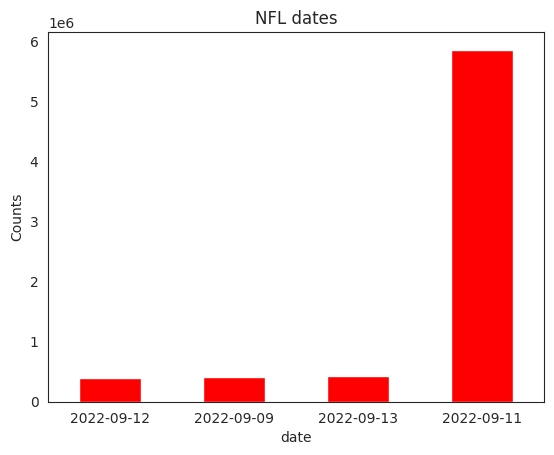

In [45]:
#sort_values() to rank increasing values

tracking1["date"].value_counts().sort_values().plot.bar(color='red', title='NFL dates')
plt.xticks(rotation=0)
plt.ylabel('Counts');

#Creating new dataset using playId, club and gameId

In [46]:
data = tracking1.query('playId == 56 and gameId == 2022090800')
print(data[["x", "y", "club"]])

                 x          y      club
6686928  89.480000  29.520000       BUF
6686929  89.390000  29.510000       BUF
6686930  89.280000  29.520000       BUF
6686931  89.150000  29.520000       BUF
6686932  89.000000  29.510000       BUF
...            ...        ...       ...
6691339  78.160004  36.650002  football
6691340  78.230003  36.389999  football
6691341  78.230003  36.389999  football
6691342  78.220001  36.389999  football
6691343  78.290001  36.070000  football

[4416 rows x 3 columns]


### Players positions

x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)

y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric

club: Team abbrevation of corresponding player (text)


#Scatter Player Positions - Alien alike :D

It's cool, seems 3D without being 3D. 

However, it's hard for a non-coder like me to interpret the meaning of this scatter plot. In fact, it seems an Alien : D 

I think **Rob Mulla** was the **1st** to plot something like that I tried below. Many kagglers copied him.
Always Robikscube to bring those awesome stuff. Though, I ruined it It was Plotly, though Plotly isn't rendering, therefore I worked with **Seaborn**..

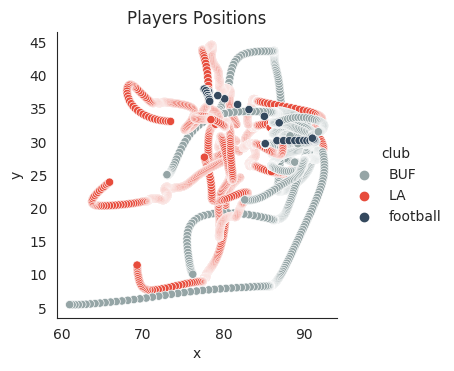

In [47]:
# define a custom palette
my_palette = ["#95a5a6", "#e74c3c", "#34495e"]
sns.pairplot(
    data,
    x_vars=["x"],
    y_vars=["y"],
    height=3.5,
    hue="club", #hue define the color-code variable
    palette=my_palette,   # <-- see here, custom palette
)
plt.title('Players Positions')
plt.show()

In [48]:
# only looking at data from plays when the home team is on the offense
right = tracking1[tracking1['playDirection'] == 'right']
# only looking at a specific match
match = right[right['gameId'] == 2022090800]

#Tackles Heatmap

I'm still trying to get those tackles and mostly this Heatmap. 

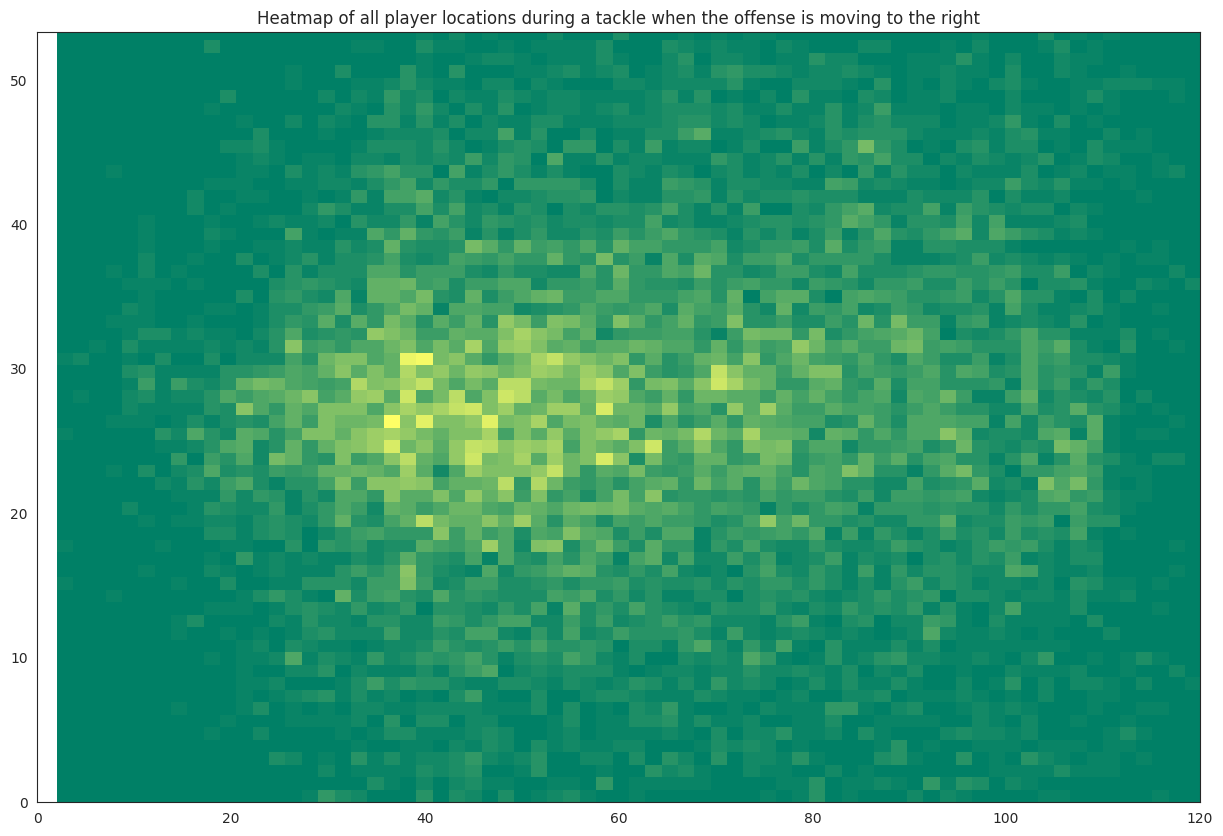

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist2d(right['x'][right['event'] == 'tackle'], right['y'][right['event'] == 'tackle'],bins=70, cmap='summer')
plt.xlim(0 , 120)
plt.ylim(0,  53.3)
plt.title('Heatmap of all player locations during a tackle when the offense is moving to the right')
plt.show()

### NFL Clubs 2025

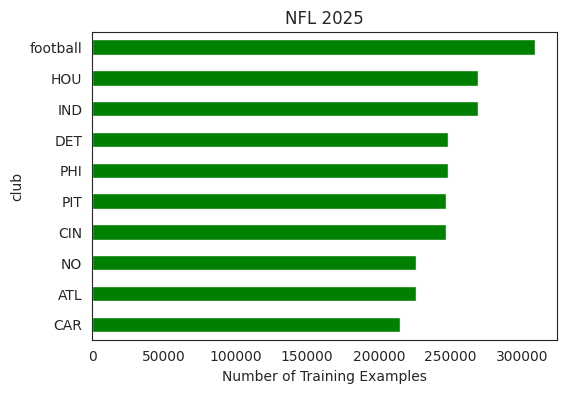

In [50]:
fig, ax = plt.subplots(figsize=(6, 4)) #figsize=(width, height))
tracking1["club"].value_counts().head(10).sort_values(ascending=True).plot(
    kind="barh", color='g', ax=ax, title="NFL 2025"
)
ax.set_xlabel("Number of Training Examples")
plt.show()